## STIMA DI G CON PENDOLO DI KATER

$T = 2\pi\sqrt{\frac{D}{g}} \Rightarrow g = \frac{4\pi^2D}{T^2}$

$\sigma_g = |-8\pi^2D|\frac{\sigma_T}{T^3}$

In [13]:
from numpy import pi as PI
import numpy as np
from interpolazione3 import final_val

# perido ottenuto con formula
T,sigmaT = 2.0026, 0.0019

D = 0.994 # distanza dei coltelli del pendolo (m)

def g_T(T,sT): # g(T)
    g = 4* PI**2 * D / T**2 # calcolo g
    sg = 8* PI**2 * D * sT/T**3 # calcolo sigma g
    return np.round(g,4),np.round(sg,4)

g1,sg1 = g_T(T,sigmaT) # misura di g
print('g: ',final_val(g1,sg1,decimals=4,udm='ms-2'))

g:  9.7849 ± 0.0186 ms-2


## STIMA DI G CON CADUTA LIBERA

vedi _caduta_libera.ipynb_

In [14]:
g2,sg2 = 9.8942, 0.0488

# CONFRONTO METODI SPERIMENTALI

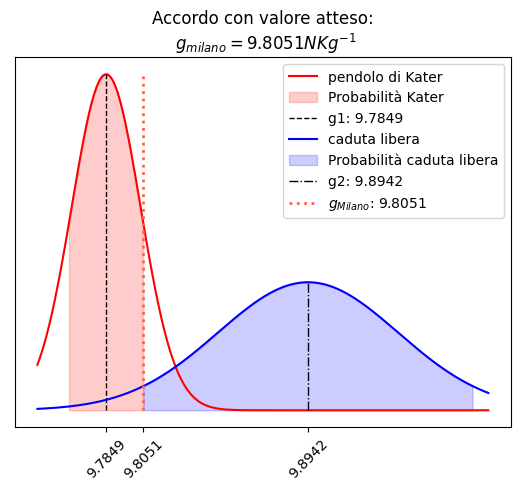

Accordo in percentuale Kater: 28% >> 5%
(distanza in sigma: 1.09)
errore relativo percentuale: 0.2% << 5%

Accordo in percentuale cadura libera: 6% >> 5%
(distanza in sigma: 1.83)
errore relativo percentuale: 0.49% << 5%



In [15]:
from interpolazione3 import probability_under_norm
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np

g_milano = 9.8051 # tabulata https://www.handelskammer.bz.it/it/servizi/regolazione-del-mercato/ufficio-metrico/metrologia-legale/titolari-strumenti/strumenti-pesare/zone-di-gravit%C3%A0-e-numero-divisioni

plt.title('Accordo con valore atteso:\n $g_{milano} = 9.8051 N Kg^{-1}$')

x = np.linspace(min(g1-2*sg1,g2-2*sg2),max(g1+2*sg1,g2+2*sg2),1000)

R = sc.norm.pdf(x,loc=g1,scale=sg1)
plt.plot(x,R, color='red', label='pendolo di Kater')
t = np.abs(g1 - g_milano) / sg1
plt.fill_between(x= x,y1= R,where= (g1- t*sg1 < x)&(x < g1 + t*sg1),color= "red",alpha= 0.2,label='Probabilità Kater')
plt.vlines(x=g1,ymin=0,ymax=max(R),linewidths=1.0,label="g1: {:.4f}".format(g1), color='black',linestyle="--")

B = sc.norm.pdf(x,loc=g2,scale=sg2)
plt.plot(x,B, color='blue', label='caduta libera')
t = np.abs(g2 - g_milano) / sg2
plt.fill_between(x= x,y1= B,where= (g2- t*sg2 < x)&(x < g2 + t*sg2),color= "blue",alpha= 0.2,label='Probabilità caduta libera')
plt.vlines(x=g2,ymin=0,ymax=max(B),linewidths=1.0,label="g2: {:.4f}".format(g2), color='black',linestyle="-.")

plt.vlines(x=g_milano,ymax=max(R),ymin=0,linewidths=2.0,label="$g_{Milano}$"+f": {g_milano}", color='#FF6347',linestyle="dotted")

plt.xticks([g1,g2,g_milano],rotation=45)
plt.yticks([])
plt.legend()
plt.show()

p = (1-probability_under_norm(g1,sg1,g_milano))*100
print(f'Accordo in percentuale Kater: {int(p)}% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(g1 - g_milano) / sg1,2)})')
print(f'errore relativo percentuale: {np.round(sg1/g1,3)*100}% << 5%\n')

p = (1-probability_under_norm(g2,sg2,g_milano))*100
print(f'Accordo in percentuale cadura libera: {int(p)}% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(g2 - g_milano) / sg2,2)})')
print(f'errore relativo percentuale: {np.round(sg2/g2,4)*100}% << 5%\n')

Il pendolo di Kater ha fornito un valore dell'accellerazione di gravità più fedele a quello atteso e più preciso rispetto alla caduta libera